# MACHINE LEARNING - CAC 3 :- 

## Final Lab Submission 

<hr/>

**Submitted by:-** <br>

Name: **Anukriti Sharma** <br>
Register Number: **20112006** <br>
Class: **4 BSc Data Science** <br> 

<hr/>

## LAB OVERVIEW
<hr/>

### Objectives :


- Find out a Dataset, and compare at least two different algorithms and choose the best one
- Use suitable Data Preprocessing and Feature Selection/Engineering Methods
- Fine tune the model and hyper parameters and Finalise the Model
- Make the model deployment-ready by giving User-Input provision


## SECTIONS

<hr/>

**For this lab, the sections are :-**

1. Lab Overview
1. References
1. Follow the above steps given in lab overview
1. Conclusion

## REFERENCES :-

- https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
- https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
- https://www.javatpoint.com/machine-learning-random-forest-algorithm



## ABOUT THE DATASET

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

**Columns used in the dataset are :-**

- hotel:-  (H1 = Resort Hotel or H2 = City Hotel)

- is_canceled:- Value indicating if the booking was canceled (1) or not (0)

- lead_time:-  Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

- arrival_date_month:- Month of arrival date

- arrival_date_week_number:- Week number of year for arrival date

- arrival_date_day_of_month:- Day of arrival date

- stays_in_weekend_nights:- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- stays_in_week_nights:- Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- adults:- Number of adults

- children:- Number of children

- babies:- Number of babies

- meal:- Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

- country:- Country of origin. Categories are represented in the ISO 3155–3:2013 format

- market_segment:- Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- distribution_channel:- Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- is_repeated_guest:- Value indicating if the booking name was from a repeated guest (1) or not (0)

- previous_cancellations:- Number of previous bookings that were cancelled by the customer prior to the current booking

- previous_bookings_not_canceled:- Number of previous bookings not cancelled by the customer prior to the current booking

- reserved_room_type:- Code of room type reserved. Code is presented instead of designation for anonymity reasons

- deposit_type:- Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No

- agent:- ID of the travel agency that made the booking

- customer_type:- Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group

- adr:- Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- required_car_parking_spaces:- Number of car parking spaces required by the customer

- total_of_special_requests:- Number of special requests made by the customer (e.g. twin bed or high floor)

- reservation_status_date:- Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to



### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sympy import Matrix


# LIBRARIES TO IGNORE WARNINGS
import warnings as w
w.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df=pd.read_csv("hotel_booking.csv")
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  customer_type     adr  \
0                          0       2  ...      Transient    0.00   
1                          0       2  ...      Transient    0.00   
2                          1       1  ...      Transient   75.00   
3                          1       1  ...      Transient   75.00   
4                          2       2  ...      Transient   98.00   
...                      ...     ...  ...            ...     ...   
119385                     5       2  ...      Transient   96.14   
119386                     5       3  ...      Transient  225.43   
119387                     5       2  ...      Transient  157.71   
119388                     5       2  ...      Transient  104.40   
119389                     7       2  ...      Transient  151.20   

       required_car_parking_spaces total_of_special_requests  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

       reservation_status reservation_status_date                name  \
0               Check-Out              01-07-2015       Ernest Barnes   
1               Check-Out              01-07-2015        Andrea Baker   

##  DATA PREPROCESSING

### Concise Summary of a Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Checking the presence of null values

In [4]:
df.isnull()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  arrival_date_day_of_month  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
119385                     False                      False   
119386                     False                      False   
119387                     False                      False   
119388                     False                      False   
119389                     False                      False   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                         False                 False   False  ...   
1                         False                 False   False  ...   
2                         False                 False   False  ...   
3                         False                 False   False  ...   
4                         False                 False   False  ...   
...                         ...                   ...     ...  ...   
119385                    False                 False   False  ...   
119386                    False                 False   False  ...   
119387                    False                 False   False  ...   
119388                    False                 False   False  ...   
119389                    False                 False   False  ...   

        customer_type    adr  required_car_parking_spaces  \
0               False  False                        False   
1               False  False                        False   
2               False  False                        False   
3               False  False                        False   
4               False  False                        False   
...               ...    ...                          ...   
119385          False  False                        False   
119386          False  False                        False   
119387          False  False                        False   
119388          False  False                        False   
119389          False  False                        False   

        total_of_special_requests  reservation_status  \
0                           False               False   
1                           False               False   
2                           False               False   
3                           False               False   
4                           False               False   
...                           ...                 ...   
119385                      False               False   
119386                      False               False   
119387                      False               False   
119388                      False               False   
119389                      False               False   

        reservation_status_date

### Number of missing values in the Dataset

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Printing first ten values of a dataset

In [6]:
df.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   
5                        0                     2       2  ...      Transient   
6                        0                     2       2  ...      Transient   
7                        0                     2       2  ...      Transient   
8                        0                     3       2  ...      Transient   
9                        0                     3       2  ...      Transient   

     adr required_car_parking_spaces total_of_special_requests  \
0    0.0                           0                         0   
1    0.0                           0                         0   
2   75.0                           0                         0   
3   75.0                           0                         0   
4   98.0                           0                         1   
5   98.0                           0                         1   
6  107.0                           0                         0   
7  103.0                           0                         1   
8   82.0                           0                         1   
9  105.5                           0                         0   

  reservation_status reservation_status_date              name  \
0          Check-Out              01-07-2015     Ernest Barnes   
1          Check-Out              01-07-2015      Andrea Baker   
2          Check-Out              02-07-2015    Rebecca Parker   
3          Check-Out              02-07-2015      Laura Murray   
4          Check-Out              03-07-2015       Linda Hines   
5          Check-Out              03-07-2015  Jasmine Fletcher   
6          Check-Out              03-07-2015      Dylan Rangel   
7          Check-Out              03-07-2015     William Velez   
8           Canceled              06-05-2015     Steven Murphy   
9           Canceled              22-04-2015     Michael Moore   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea

### Description of the data in the dataset which includes count, mean, min, max, standard deviation, etc.

In [7]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

### Dropping the useless columns in the dataset

In [8]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status',
             'days_in_waiting_list','company','name',
              'email','phone-number','credit_card']

df.drop(useless_col, axis = 1, inplace = True)

### Handling the missing values

In [9]:
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('PRT')

In [10]:
df.head(10)

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   
5  Resort Hotel            0         14               July   
6  Resort Hotel            0          0               July   
7  Resort Hotel            0          9               July   
8  Resort Hotel            1         85               July   
9  Resort Hotel            1         75               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2       0.0  ...   
1                        0                     0       2       0.0  ...   
2                        0                     1       1       0.0  ...   
3                        0                     1       1       0.0  ...   
4                        0                     2       2       0.0  ...   
5                        0                     2       2       0.0  ...   
6                        0                     2       2       0.0  ...   
7                        0                     2       2       0.0  ...   
8                        0                     3       2       0.0  ...   
9                        0                     3       2       0.0  ...   

   previous_cancellations previous_bookings_not_canceled reserved_room_type  \
0                       0                              0                  C   
1                       0                              0                  C   
2                       0                              0                  A   
3                       0                              0                  A   
4                       0                              0                  A   
5                       0                              0                  A   
6                       0                              0                  C   
7                       0                              0                  C   
8                       0                              0                  A   
9                       0                              0                  D   

  deposit_type  agent  customer_type    adr  required_car_parking_spaces  \
0   No Deposit    0.0      Transient    0.0                            0   
1   No Deposit    0.0      Transient    0.0                            0   
2   No Deposit    0.0      Transient   75.0                            0   
3   No Deposit  304.0      Transient   75.0                            0   
4   No Deposit  240.0      Transient   98.0                            0   
5   No Deposit  240.0      Transient   98.0                            0   
6   No Deposit    0.0      Transient  107.0                            0   
7   No Deposit  303.0      Transient  103.0                            0   
8   No Deposit  240.0      Transient   82.0                            0   
9   No Deposit   15.0      Transient  105.5                            0   

  total_of_special_requests reservation_status_date  
0                         0              01-07-2015  
1                         0              01-07-

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

We can see that there are no missing values after dropping and filling the missing values.

In [12]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
deposit_type                       object
agent                             float64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

**Printing the categorical and numerical values**

In [14]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
           cat.append(i)
            
    else:
            num.append(i)

In [15]:
print("Categorical values:" ,cat)
print("Numerical values:", num)

Categorical values: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']
Numerical values: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


**List of categorical features in the dataset**

In [16]:
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
country 177
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926


**Unique values for each categorical columns**

In [17]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [18]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [19]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [20]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [21]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [22]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [23]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [24]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [25]:
df['reservation_status_date'].unique()

array(['01-07-2015', '02-07-2015', '03-07-2015', '06-05-2015',
       '22-04-2015', '23-06-2015', '05-07-2015', '06-07-2015',
       '07-07-2015', '08-07-2015', '11-05-2015', '15-07-2015',
       '16-07-2015', '29-05-2015', '19-05-2015', '19-06-2015',
       '23-05-2015', '18-05-2015', '09-07-2015', '02-06-2015',
       '13-07-2015', '04-07-2015', '29-06-2015', '16-06-2015',
       '18-06-2015', '12-06-2015', '09-06-2015', '26-05-2015',
       '11-07-2015', '12-07-2015', '17-07-2015', '15-04-2015',
       '13-05-2015', '10-07-2015', '20-05-2015', '12-05-2015',
       '14-07-2015', '17-06-2015', '01-05-2015', '30-03-2015',
       '19-07-2015', '03-06-2015', '26-06-2015', '14-05-2015',
       '20-07-2015', '07-05-2015', '28-05-2015', '13-04-2015',
       '25-03-2015', '21-07-2015', '27-06-2015', '18-07-2015',
       '23-07-2015', '08-06-2015', '22-06-2015', '24-06-2015',
       '05-03-2015', '01-06-2015', '24-04-2015', '22-07-2015',
       '27-05-2015', '06-04-2015', '11-04-2015', '25-07

**Count of variables for each column**

In [26]:
df['meal'].value_counts(normalize = True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

In [27]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [28]:
df['distribution_channel'].value_counts(normalize = True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

In [29]:
df['reserved_room_type'].value_counts(normalize = True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

In [30]:
df['deposit_type'].value_counts(normalize = True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

In [31]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [32]:
df

hotel  is_canceled  lead_time arrival_date_month  \
0       Resort Hotel            0        342               July   
1       Resort Hotel            0        737               July   
2       Resort Hotel            0          7               July   
3       Resort Hotel            0         13               July   
4       Resort Hotel            0         14               July   
...              ...          ...        ...                ...   
119385    City Hotel            0         23             August   
119386    City Hotel            0        102             August   
119387    City Hotel            0         34             August   
119388    City Hotel            0        109             August   
119389    City Hotel            0        205             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                             0                     0       2       0.0  ...   
1                             0                     0       2       0.0  ...   
2                             0                     1       1       0.0  ...   
3                             0                     1       1       0.0  ...   
4                             0                     2       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                        2                     5       2       0.0  ...   
119388                        2                     5       2       0.0  ...   
119389                        2                     7       2       0.0  ...   

        previous_cancellations previous_bookings_not_canceled  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
...                        ...                            ...   
119385                       0                              0   
119386                       0                              0   
119387                       0                              0   
119388                       0                              0   
119389                       0                              0   

       reserved_room_type deposit_type  agent  customer_type     adr  \
0                       C   No Deposit    0.0      Transient    0.00   
1                       C   No Deposit    0.0      Transient    0.00   
2                       A   No Deposit    0.0      Transient   75.00   
3                       A   No Deposit  304.0      Transient   75.00   
4                       A   No Deposit  240.0      Transient   98.00   
...                   ...          ...    ...            ...     ...   
119385                  A   No Deposit  394.0      Transient   96.14   
119386                  E   No Deposit    9.0      Transient  225.43   
119387                  D   No Deposit    9.0      Transient  1

## EXPLORATORY DATA ANALYSIS

**Total columns for Exploratory data analysis**

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date'],
      dtype='object')

In [34]:
df.shape

(119390, 26)

There are 119390 rows and 27 columns after preprocessing of the dataset.

**Types of Hotel**

In [35]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

**Number of bookings for each hotel**

In [36]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

We can see that the booking for city hotel is more than the resort hotel.

**Bar graph showing the booking for each hotel**

Text(0, 0.5, 'Reservation Count')

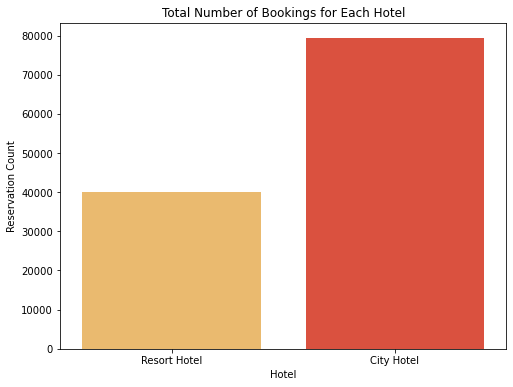

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(x='hotel', data = df, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

The above graph depicts that approximately 34% of the reservations were booked for Resort hotel and 66% were booked for City Hotel.


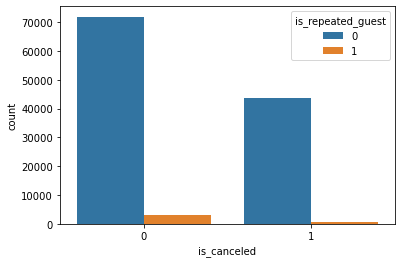

In [38]:
sns.countplot(data=df, x = 'is_canceled', hue='is_repeated_guest');

we can see that guests that aren't repeated guests canceled the trip which make sense.

<AxesSubplot:xlabel='hotel', ylabel='count'>

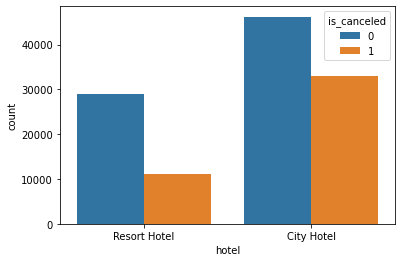

In [39]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')

**Number of canceled and not canceled bookings**

In [40]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

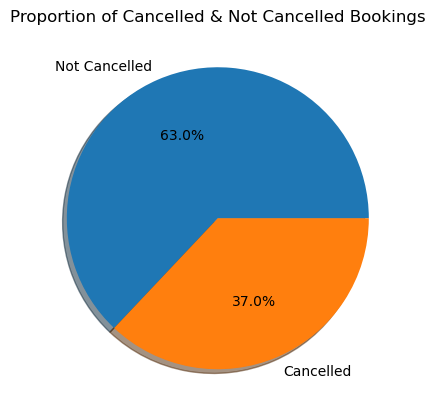

In [41]:
plt.figure(figsize=(7,5), dpi=100)
proportion = df['is_canceled'].value_counts()

labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.

**Cancellation of Booking by Hotel Type**

In [42]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

We can see that more number of bookings were cancelled for City Hotel

**Bar graph showing the Cancellation of booking for each hotel**

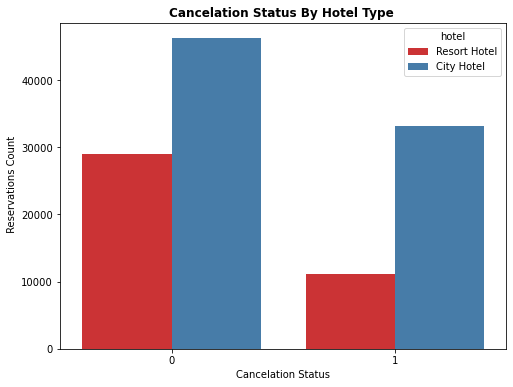

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(x='is_canceled', data = df, hue = 'hotel', palette= 'Set1')

plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

- For the Resort Hotel, total of 25.14% Bookings were cancelled
- For the City Hotel, total of 74.85% Bookings were cancelled

**Bar graph showing the number of Bookings with respect to each month**

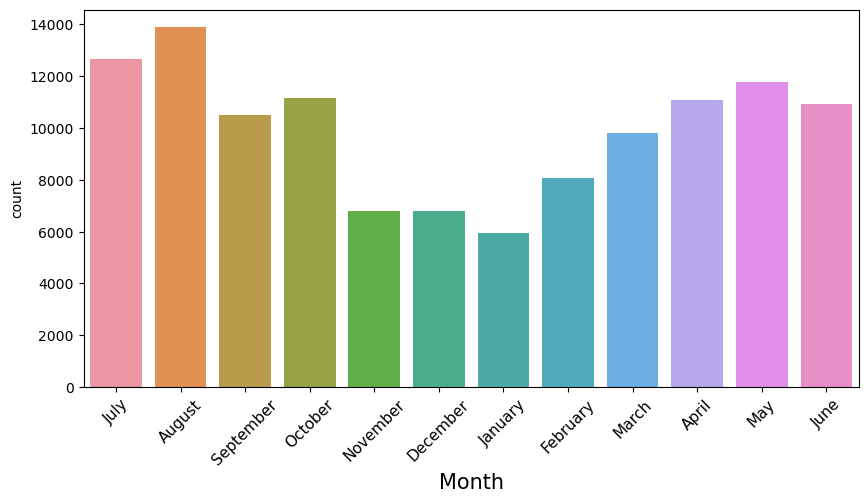

In [44]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

- The above graph depicts the number of bookings created for each month
- According to the graph, August is the most occupied (busiest) month

**Line Plot showing the Average daily rate (ADR) of both the hotels with respect to the months**

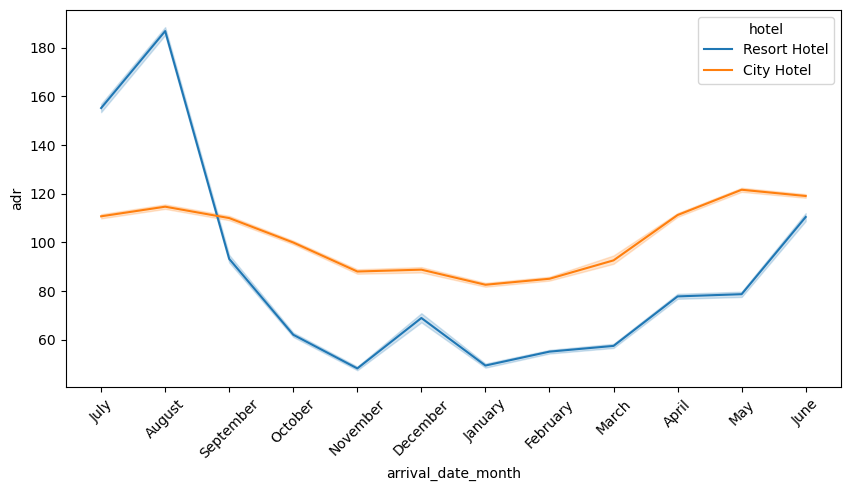

In [45]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

- In general City Hotel has higher prices.
- This plot shows that in August which was the crowdest month, City hotel charge guests the most.

**Top 10 countries of origin of Hotel visitors**

In [46]:
df['country'].value_counts(normalize = True)[:10]

PRT    0.411073
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
ITA    0.031544
IRL    0.028269
BEL    0.019616
BRA    0.018628
NLD    0.017623
Name: country, dtype: float64

In [47]:
df['country'].value_counts()[:5]

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

**We can see that PRT has most number of hotel visitors**

**Bar graph showing the top 10 countries of origin of the guests**

Text(0, 0.5, 'Reservation Count')

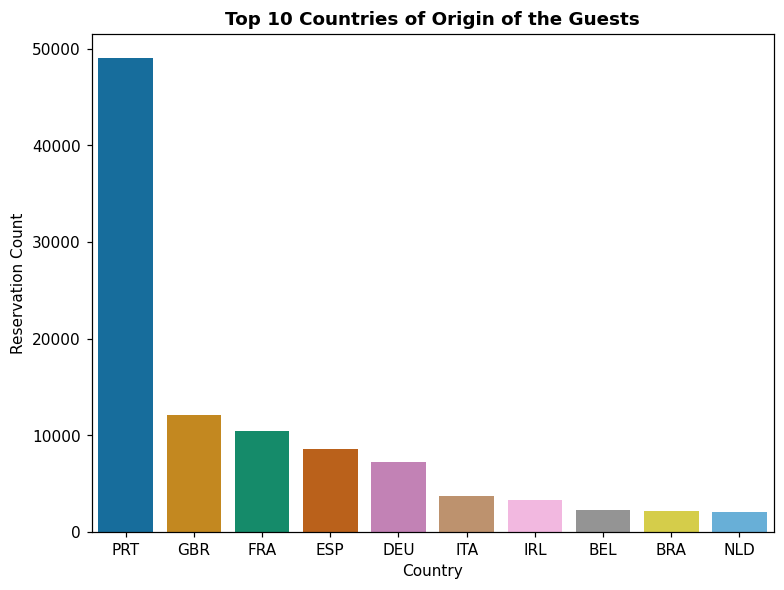

In [48]:
plt.figure(figsize=(8,6), dpi=110)

sns.countplot(data=df, x='country',order=pd.value_counts(df['country']).iloc[:10].index,
              palette='colorblind')

plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

This graph show information about the countries that have most bookings. Most of bookings are created from Portugal and then Great Britain in second place and France.

**Exploring Number of Special Requests**

In [49]:
df['total_of_special_requests'].value_counts(normalize = True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

**Bar graph showing the number of Special requests**

Text(0, 0.5, 'Count')

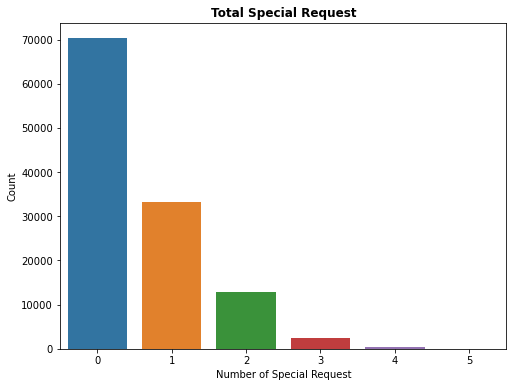

In [50]:
plt.figure(figsize = (8,6))
sns.countplot(data=df, x='total_of_special_requests')

plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

From the above graph we can depict that around 58.8% bookings do not have any special requests from the guests

**Exploring Number of Reserved room types and the cancellation related with it**

In [51]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

**Graph representing reserved room type of each hotel with respect to the average daily rate(ADR)**

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

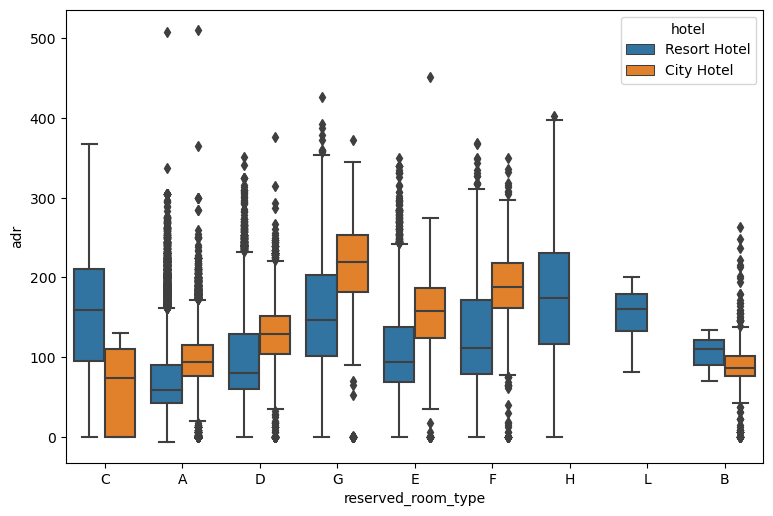

In [52]:
data = df[df['is_canceled'] == 0]
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'reserved_room_type', y = 'adr', hue = 'hotel')

The above plot shows that August was the busiest month and January was the least.


**Bar Graph showing the count of Market Segment**

In [53]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

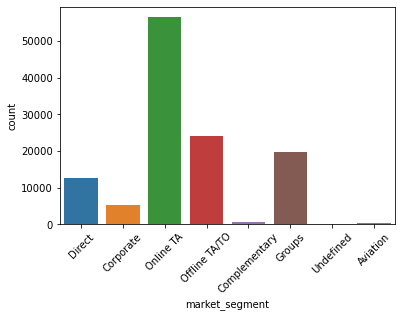

In [54]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45,fontsize=10);

We all know in currect people use of technology are masively increased and we can see in the above plot that almost 50 percent of reservations are apply via Online Travel Agents.

**Bar Graph showing the representation of market segment for each hotel**

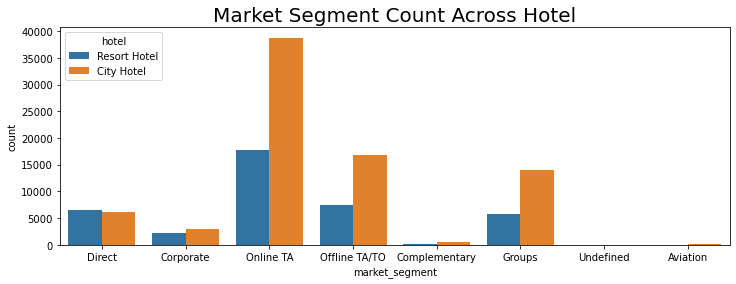

In [55]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x = 'market_segment', hue='hotel')
plt.title('Market Segment Count Across Hotel', fontdict={'fontsize' : 20})
plt.show()

We can see that the City hotel uses Online Travel agents more than the Resort hotel.

**Bar Graph showing the Total number of special requests with respect to cancellation**

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

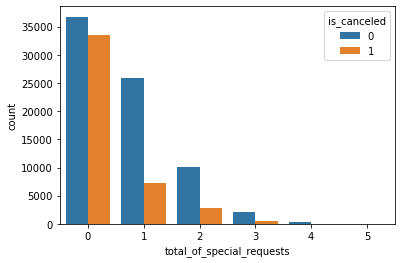

In [56]:
sns.countplot(data=df, x= 'total_of_special_requests', hue='is_canceled')

Nearly half bookings without any special requests have been canceled and another half of them have not been canceled.



**Bar Graph showing the count of total number of nights for both the hotels** 

In [57]:
df_not_canceled = df[df['is_canceled'] == 0]


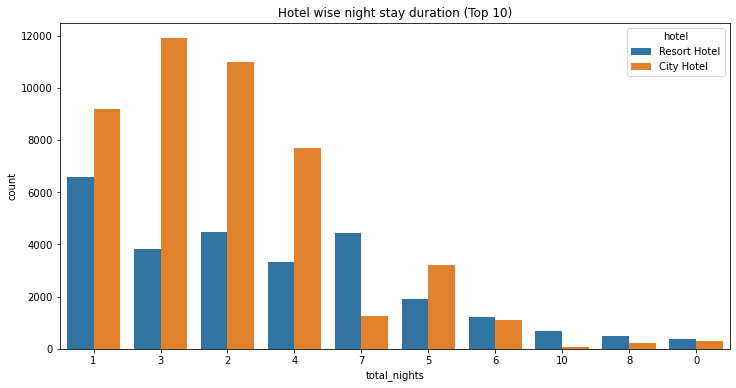

In [58]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index,ax=ax);

As we see, for city hotel the most stay duration is one,three and two and for resort hotel the most stay duration is one, two and seven.

**Effect of Meal Type on Cancellations**

In [59]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [60]:
df.groupby('meal')['is_canceled'].value_counts()

meal       is_canceled
BB         0              57800
           1              34510
FB         1                478
           0                320
HB         0               9479
           1               4984
SC         0               6684
           1               3966
Undefined  0                883
           1                286
Name: is_canceled, dtype: int64

**Bar graph showing the Meal type on cancellations**

Text(0, 0.5, 'Reservation Count')

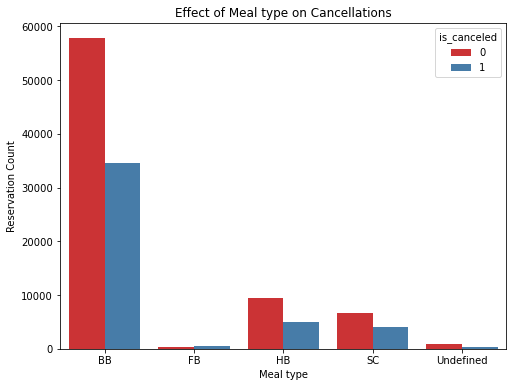

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= 'meal', hue = 'is_canceled', palette= 'Set1')

plt.title ('Effect of Meal type on Cancellations')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

This graph depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type

**Pie chart showing the percentage of meal types**

In [62]:
px.pie(data_frame=df[df['is_canceled']==0],names=df['meal'].value_counts().index,values=df['meal'].value_counts())

The guests are prefered to booked meal BB Bed & Breakfast


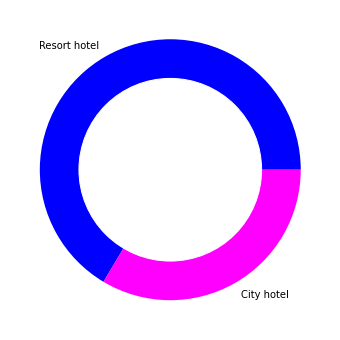

In [63]:
plt.figure(figsize=(8, 6))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.hotel.value_counts(), labels=['Resort hotel','City hotel'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle);

**Plotting the Correlation heatmap**

<AxesSubplot:>

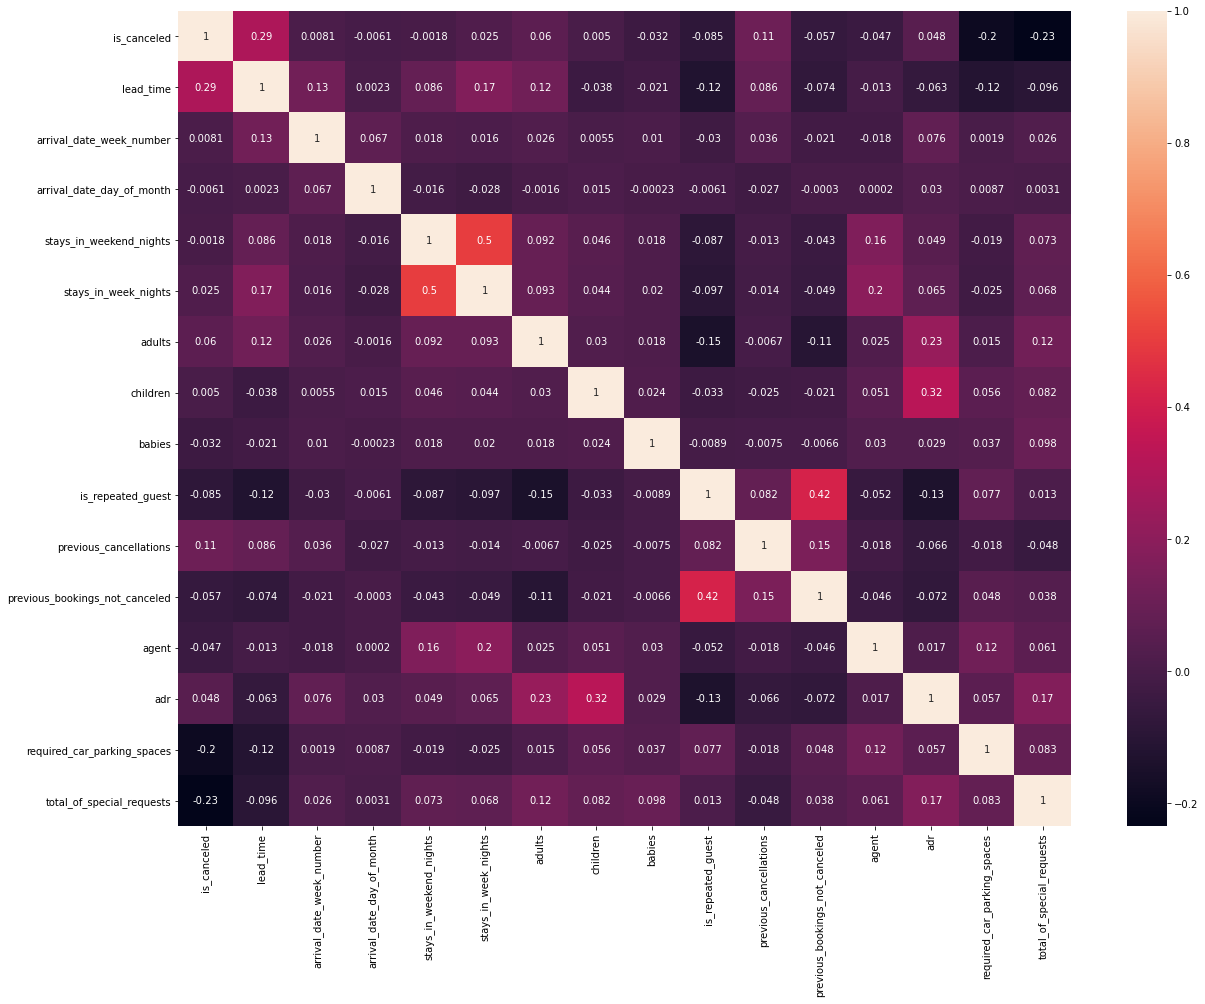

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

## PREPROCESSING FOR LABEL ENCODING

**DROPPING FEW UNNECESSARY COLUMNS**

In [65]:
unnecessary_col = ['arrival_date_month','country','reservation_status_date']

df.drop(unnecessary_col, axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

**LABEL ENCODING**

In [66]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


df['hotel']= label_encoder.fit_transform(df['hotel'])
df['meal']= label_encoder.fit_transform(df['meal'])
df['market_segment']= label_encoder.fit_transform(df['market_segment'])
df['distribution_channel']= label_encoder.fit_transform(df['distribution_channel'])
df['reserved_room_type']= label_encoder.fit_transform(df['reserved_room_type'])
df['deposit_type']= label_encoder.fit_transform(df['deposit_type'])
df['customer_type']= label_encoder.fit_transform(df['customer_type'])

**Number of Categorical variables in the dataset after preprocessing of the dataset**

In [67]:
a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

In [68]:
df.head()

hotel  is_canceled  lead_time  arrival_date_week_number  \
0      1            0        342                        27   
1      1            0        737                        27   
2      1            0          7                        27   
3      1            0         13                        27   
4      1            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ...  is_repeated_guest  previous_cancellations  \
0       2       0.0       0  ...                  0                       0   
1       2       0.0       0  ...                  0                       0   
2       1       0.0       0  ...                  0                       0   
3       1       0.0       0  ...                  0                       0   
4       2       0.0       0  ...                  0                       0   

   previous_bookings_not_canceled  reserved_room_type  deposit_type  agent  \
0                               0                   2             0    0.0   
1                               0                   2             0    0.0   
2                               0                   0             0    0.0   
3                               0                   0             0  304.0   
4                               0                   0             0  240.0   

   customer_type   adr  required_car_parking_spaces  total_of_special_requests  
0              2   0.0                            0                          0  
1              2   0.0                            0                          0  
2              2  75.0                            0                          0  
3              2  75.0                            0                          0  
4              2  98.0                            0                          1  

[5 rows x 23 columns]

## TRAIN-TEST SPLIT

**Dividing the dataset into independent(features) and dependent variable(Target)**

In [69]:
print("*"*120)
print('SPLITTNG THE DATASET INTO FEATURES AND TARGET'.center(50))
print("*"*120)

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled']


************************************************************************************************************************
  SPLITTNG THE DATASET INTO FEATURES AND TARGET   
************************************************************************************************************************


**Training and testing the model using train test split library and dividing the dataset into train(80%) and test(20%) data**

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)

## FEATURE SCALING


In [71]:
print("*"*120)
print('STANDARDIZING THE DATASET'.center(50))
print("*"*120)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

************************************************************************************************************************
            STANDARDIZING THE DATASET             
************************************************************************************************************************


## TRAIN THE MODEL USING DECISION TREE

**Here we are using decision tree classifier to predict the accuracy of the model**

In [72]:
print("*"*120)
print('TRAINING THE DATASET USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

************************************************************************************************************************
TRAINING THE DATASET USING DECISION TREE ALGORITHM
************************************************************************************************************************


**Model Evaluation**

In [84]:
print("*"*120)
print('ACCURACY SCORE OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(acc_dtc)


************************************************************************************************************************
ACCURACY SCORE OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************
0.7680431080213307


************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************


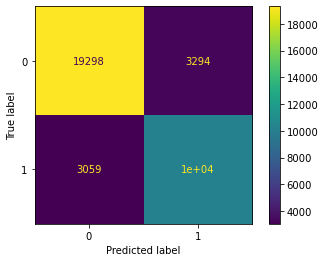

In [74]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [75]:
print("Confusion Matrix:\n")
Matrix(confusion_matrix(y_test,y_pred_dtc))

Confusion Matrix:



Matrix([
[19298,  3294],
[ 3059, 10166]])

In [78]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)

class_report = classification_report(y_test, y_pred_dtc)

print(class_report)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22592
           1       0.76      0.77      0.76     13225

    accuracy                           0.82     35817
   macro avg       0.81      0.81      0.81     35817
weighted avg       0.82      0.82      0.82     35817



In [79]:
pd.DataFrame(index = X.columns, data = dtc.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
deposit_type                              0.237278
lead_time                                 0.151874
adr                                       0.106944
arrival_date_day_of_month                 0.079677
arrival_date_week_number                  0.068314
total_of_special_requests                 0.056569
agent                                     0.048746
market_segment                            0.045116
stays_in_week_nights                      0.043968
previous_cancellations                    0.032940
stays_in_weekend_nights                   0.025672
customer_type                             0.020052
required_car_parking_spaces               0.019607
reserved_room_type                        0.017364
adults                                    0.013583
meal                                      0.010877
previous_bookings_not_canceled            0.007177
children                                  0.006821
hotel                                     0.003330
distribution_channel                      0.002054
babies                                    0.001160
is_repeated_guest                         0.000879

**PLOT OF THE DECISION TREE**

************************************************************************************************************************
     PLOTTING THE DECISION TREE FOR THE MODEL     
************************************************************************************************************************


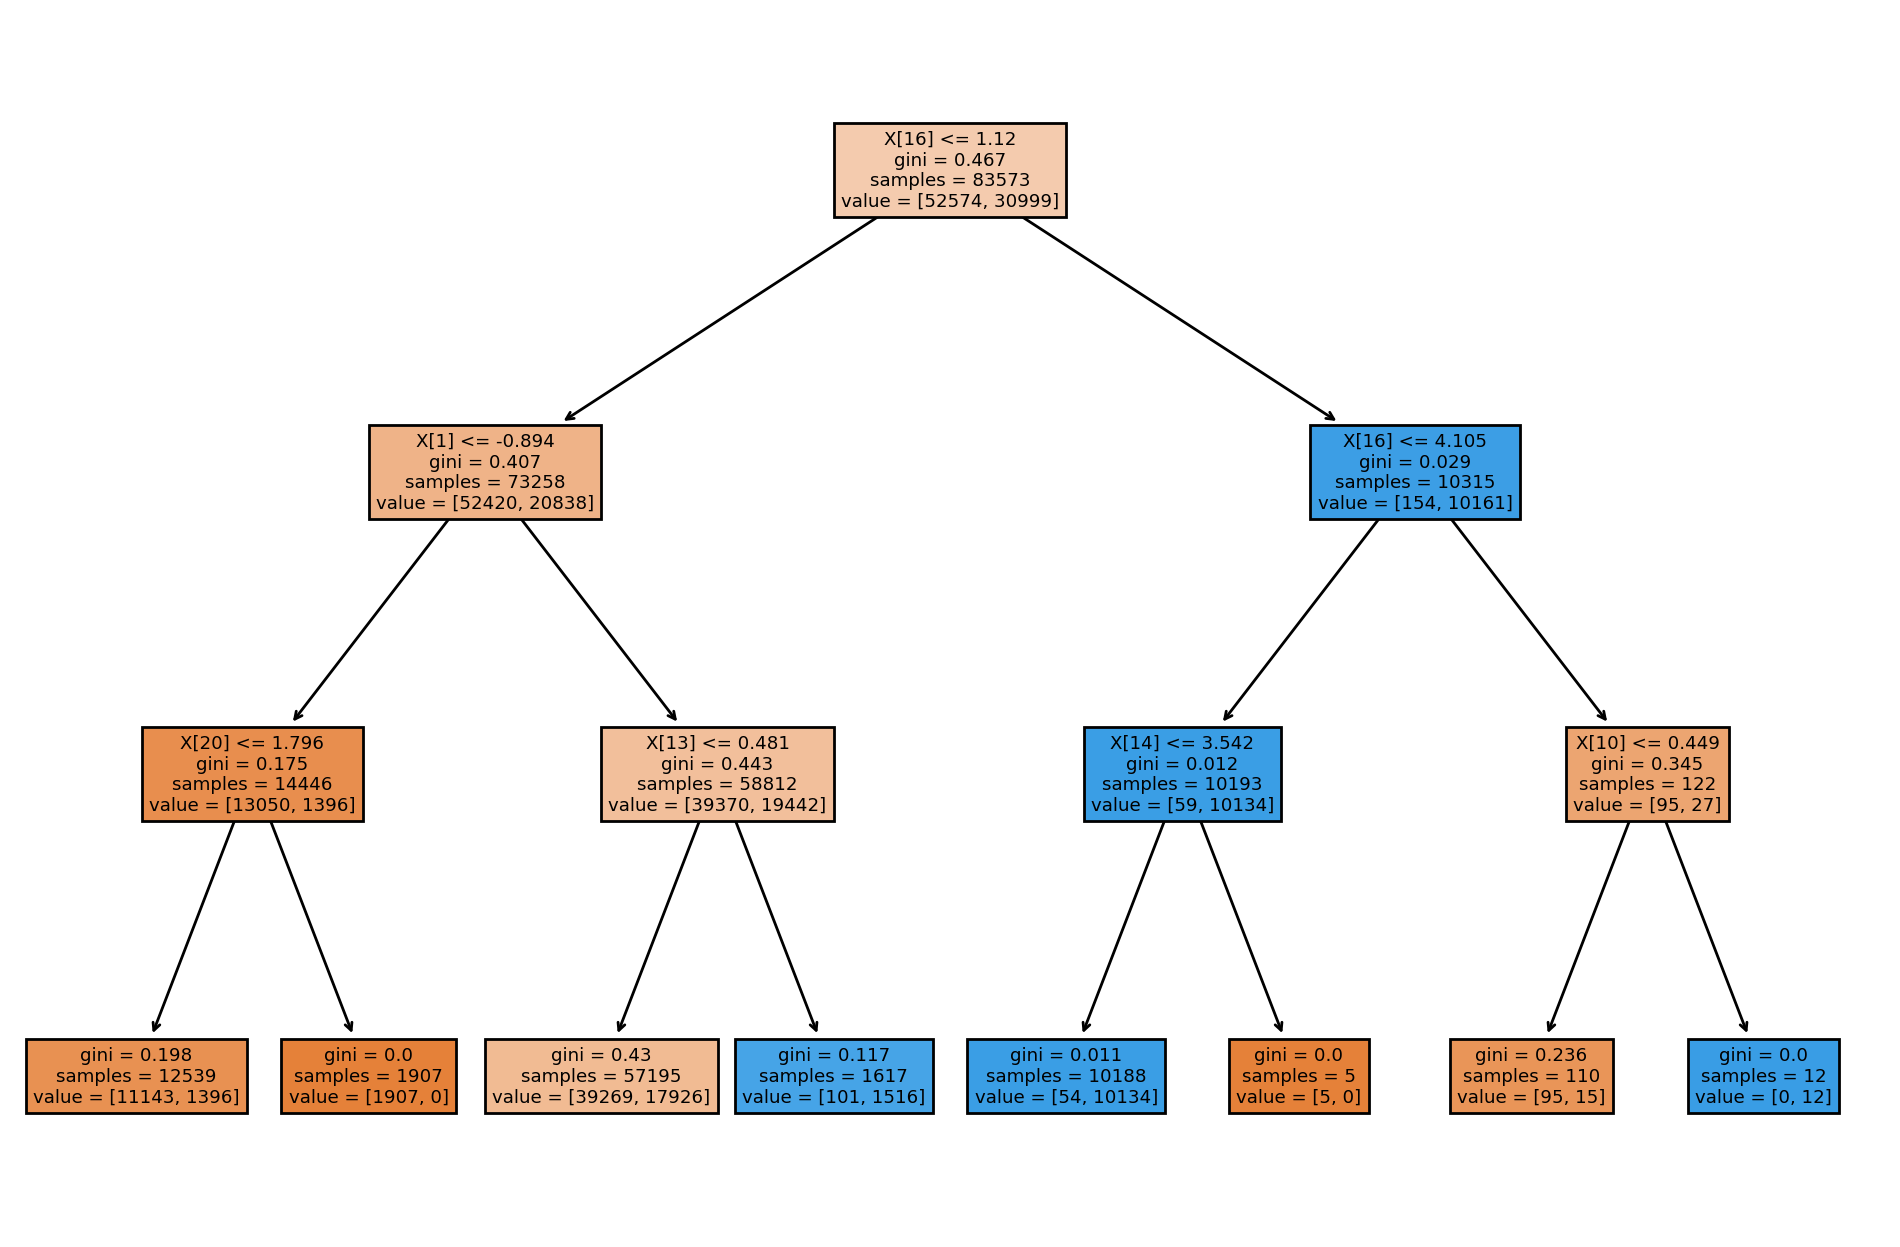

In [80]:
print("*"*120)
print('PLOTTING THE DECISION TREE FOR THE MODEL'.center(50))
print("*"*120)

from sklearn.tree import plot_tree



plt.figure(figsize=(12,8), dpi=200)

pruned_dtc = DecisionTreeClassifier(max_depth=3)
pruned_dtc.fit(X_train, y_train)
y_pred_dtc = pruned_dtc.predict(X_test)

plot_tree(pruned_dtc, filled = True);

## TRAIN THE MODEL USING LOGISTIC REGRESSION

**Here we are using logistic regression to predict the accuracy of the model**

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
print("*"*120)
print('TRAINING THE DATASET USING LOGISTIC REGRESSION ALGORITHM'.center(50))
print("*"*120)


log_model= LogisticRegression()
log_model.fit(X_train, y_train)
y_pred= log_model.predict(X_test)


************************************************************************************************************************
TRAINING THE DATASET USING LOGISTIC REGRESSION ALGORITHM
************************************************************************************************************************


**Model Evaluation**

In [85]:
print("*"*120)
print('ACCURACY OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM'.center(50))
print("*"*120)

acc_logistic = accuracy_score(y_test, y_pred)
print(acc_logistic)

************************************************************************************************************************
ACCURACY OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM
************************************************************************************************************************
0.7947901834324482


************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM
************************************************************************************************************************


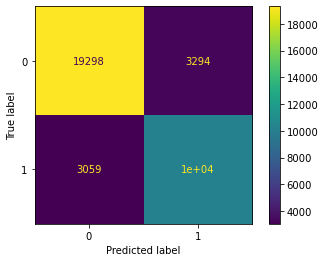

In [86]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [87]:
print("Confusion Matrix:\n")
Matrix(confusion_matrix(y_test,y_pred))

Confusion Matrix:



Matrix([
[21602,  990],
[ 6360, 6865]])

In [88]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM'.center(50))
print("*"*120)

classi_report = classification_report(y_test, y_pred)

print(classi_report)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING LOGISTIC REGRESSION ALGORITHM
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     22592
           1       0.87      0.52      0.65     13225

    accuracy                           0.79     35817
   macro avg       0.82      0.74      0.75     35817
weighted avg       0.81      0.79      0.78     35817



## TRAIN THE MODEL USING KNN (K-Nearest Neighbor)

In [ ]:
print("*"*120)
print('TRAINING THE DATASET USING KNN ALGORITHM'.center(50))
print("*"*120)


from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

In [89]:
print("*"*120)
print('ACCURACY OF THE MODEL USING KNN ALGORITHM'.center(50))
print("*"*120)

acc_knn = accuracy_score(y_test, y_pred)
print(acc_knn)

************************************************************************************************************************
    ACCURACY OF THE MODEL USING KNN ALGORITHM     
************************************************************************************************************************
0.7947901834324482


In [90]:
print("Confusion Matrix:\n")
Matrix(confusion_matrix(y_test,y_pred))

Confusion Matrix:



Matrix([
[21602,  990],
[ 6360, 6865]])

************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING KNN ALGORITHM
************************************************************************************************************************


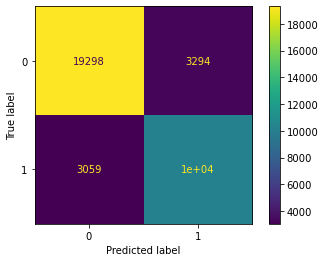

In [91]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING KNN ALGORITHM'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [92]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING KNN ALGORITHM'.center(50))
print("*"*120)

clf_report_knn = classification_report(y_test, y_pred)
print(clf_report_knn)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING KNN ALGORITHM
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     22592
           1       0.87      0.52      0.65     13225

    accuracy                           0.79     35817
   macro avg       0.82      0.74      0.75     35817
weighted avg       0.81      0.79      0.78     35817



## TRAIN THE MODEL USING RANDOM FOREST ALGORITHM

In [93]:
print("*"*120)
print('TRAINING THE DATASET USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)

from sklearn.ensemble import RandomForestClassifier  
Randomclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
Randomclassifier.fit(X_train, y_train)
y_pred= Randomclassifier.predict(X_test) 

************************************************************************************************************************
TRAINING THE DATASET USING RANDOM FOREST ALGORITHM
************************************************************************************************************************


In [94]:
print("*"*120)
print('ACCURACY OF THE MODEL USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_random = accuracy_score(y_test, y_pred)
print(acc_random)

************************************************************************************************************************
ACCURACY OF THE MODEL USING RANDOM FOREST ALGORITHM
************************************************************************************************************************
0.856213529888042


In [95]:
print("Confusion Matrix:\n")
Matrix(confusion_matrix(y_test,y_pred))

Confusion Matrix:



Matrix([
[20961, 1631],
[ 3519, 9706]])

************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING RANDOM FOREST ALGORITHM
************************************************************************************************************************


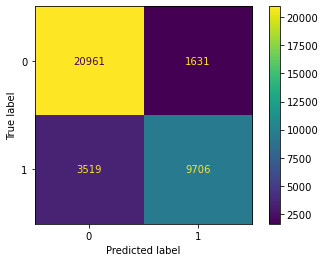

In [96]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Randomclassifier, X_test, y_test)

In [97]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)

clf_report_random= classification_report(y_test, y_pred)
print(clf_report_random)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING RANDOM FOREST ALGORITHM
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22592
           1       0.86      0.73      0.79     13225

    accuracy                           0.86     35817
   macro avg       0.86      0.83      0.84     35817
weighted avg       0.86      0.86      0.85     35817



### COMPARING THE ACCURACY FOR EACH ALGORITHM USED ABOVE

In [98]:
df1 = pd.DataFrame({'DECISION TREE': [acc_dtc], 'LOGISTIC REGRESSION': [acc_logistic],'KNN':[acc_knn],"RANDOM FOREST":[acc_random]})
df1

DECISION TREE  LOGISTIC REGRESSION      KNN  RANDOM FOREST
0       0.768043              0.79479  0.79479       0.856214

**Count of variables for each column after label encoding**

In [99]:
df['hotel'].value_counts(normalize = True)

0    0.664461
1    0.335539
Name: hotel, dtype: float64

In [100]:
df['meal'].value_counts(normalize = True)

0    0.773180
2    0.121141
3    0.089203
4    0.009791
1    0.006684
Name: meal, dtype: float64

In [101]:
df['market_segment'].value_counts(normalize = True)

6    0.473046
5    0.202856
4    0.165935
3    0.105587
2    0.044350
1    0.006223
0    0.001985
7    0.000017
Name: market_segment, dtype: float64

In [102]:
df['distribution_channel'].value_counts(normalize = True)

3    0.819750
1    0.122665
0    0.055926
2    0.001617
4    0.000042
Name: distribution_channel, dtype: float64

In [103]:
df['reserved_room_type'].value_counts(normalize = True)

0    0.720278
3    0.160826
4    0.054737
5    0.024265
6    0.017539
1    0.009364
2    0.007806
7    0.005034
9    0.000101
8    0.000050
Name: reserved_room_type, dtype: float64

In [104]:
df['deposit_type'].value_counts(normalize = True)

0    0.876464
1    0.122179
2    0.001357
Name: deposit_type, dtype: float64

In [105]:
df['customer_type'].value_counts(normalize = True)

2    0.750591
3    0.210436
0    0.034140
1    0.004833
Name: customer_type, dtype: float64

## Model deployment-ready by giving User-Input provision 

In [106]:

print("*"*120)
print('USER INPUT FOR MODEL DEPLOYEMENT'.center(50))
print("*"*120)

a = int(input('[1] for Resort Hotel and [0] for City Hotel \n Enter your Hotel name: '))
print("-"*50)

b = int(input('Enter the Number of days that elapsed between the entering date of the booking into the PMS and the arrival date: '))
print("-"*50)

c = int(input('[0] for BB(Bed &Breakfast)  , [2] for HB(Half Breakfast) , [3] for SC(No meal) , [4] for Undefined, [1] for FB(Full Breakfast)  \n Enter your meal type: '))
print("-"*50)

d = int(input('Enter your week number of year for arrival date: '))
print("-"*50)

e = int(input('[6] for Online TA, [5] for Offline TA/TO, [4] for Groups, [3] for Direct, [2] for Corporate, [1] for Complementary, [0] for Aviation and [7] for Undefined \n Enter your Booking Type: '))
print("-"*50)

f = int(input('Enter your day of arrival date: '))
print("-"*50)

g = int(input('[3] for TA/TO, [1] for Direct, [0] for Corporate, [2] for GDS and [4] for Undefined \n Enter your Booking Distribution channel: '))
print("-"*50)

h = int(input('Enter your Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel: '))
print("-"*50)

i = int(input('[0] for No Deposit, [1] for Non Refund and [2] for Refundable \n Enter your Deposit Type: '))
print("-"*50)

j = int(input('Enter your Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel: '))
print("-"*50)

k = int(input('[2] for Transient, [3] for Transient-Party, [0] for Contract and [1] for Group \n Enter your Customer Type: '))
print("-"*50)

l = int(input('[0] for room A, [3] for room D, [4] for room E, [5] for F, [6] for room G, [1] for room B, [2] for room C, [7] for room H, [9] for room P and [8] for room L  \n Enter your room Type: '))
print("-"*50)

m = int(input('Enter the number of adults: '))
print("-"*50)

n = int(input('Enter your number of children: '))
print("-"*50)

o = int(input('Enter your number of babies: '))
print("-"*50)

p = int(input('Enter your Value indicating if the booking name was from a repeated guest (1) or not (0): '))
print("-"*50)

q = int(input('Enter your Number of previous bookings that were cancelled by the customer prior to the current booking: '))
print("-"*50)

r = int(input('Enter your Number of previous bookings not cancelled by the customer prior to the current booking: '))
print("-"*50)

s = int(input('Enter your ID of the travel agency that made the booking: '))
print("-"*50)

t = int(input('Enter your Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights : '))
print("-"*50)

u = int(input('Enter your number of car parking spaces required by the customer: '))
print("-"*50)

v = int(input('Enter your number of special requests made by the customer: '))
print("-"*50)







************************************************************************************************************************
         USER INPUT FOR MODEL DEPLOYEMENT         
************************************************************************************************************************
[1] for Resort Hotel and [0] for City Hotel 
 Enter your Hotel name: 1
--------------------------------------------------
Enter the Number of days that elapsed between the entering date of the booking into the PMS and the arrival date: 2
--------------------------------------------------
[0] for BB(Bed &Breakfast)  , [2] for HB(Half Breakfast) , [3] for SC(No meal) , [4] for Undefined, [1] for FB(Full Breakfast)  
 Enter your meal type: 0
--------------------------------------------------
Enter your week number of year for arrival date: 3
--------------------------------------------------
[6] for Online TA, [5] for Offline TA/TO, [4] for Groups, [3] for Direct, [2] for Corporate, [1] for Complement

In [107]:
print("*"*120)
print('MODEL DEPLOYEMENT'.center(50))
print("*"*120)

pred_data = pd.DataFrame()

pred_data['hotel'] = [a]


pred_data['lead_time'] =[b]


pred_data['meal'] = [c]

pred_data['arrival_date_week_number'] = [d]


pred_data['market_segment'] = [e]


pred_data['arrival_date_day_of_month'] = [f]


pred_data['distribution_channel'] = [g]

pred_data['stays_in_weekend_nights'] = [h]

pred_data['deposit_type'] = [i]

pred_data['stays_in_week_nights'] = [j]

pred_data['customer_type'] = [k]

pred_data['reserved_room_type'] = [l]

pred_data['adults'] = [m]

pred_data['children'] = [n]


pred_data['babies'] = [o]


pred_data['is_repeated_guest'] = [p]


pred_data['previous_cancellations'] = [q]


pred_data['previous_bookings_not_canceled'] = [r]


pred_data['agent'] = [s]


pred_data['adr'] = [t]


pred_data['required_car_parking_spaces'] = [u]


pred_data['total_of_special_requests'] = [v]


y_pred =Randomclassifier.predict(pred_data)
pred_data['is_canceled'] = y_pred

************************************************************************************************************************
                MODEL DEPLOYEMENT                 
************************************************************************************************************************


**RESULT AFTER MODEL EMPLOYEMENT**

In [108]:
pred_data

hotel  lead_time  meal  arrival_date_week_number  market_segment  \
0      1          2     0                         3               6   

   arrival_date_day_of_month  distribution_channel  stays_in_weekend_nights  \
0                          3                     0                        2   

   deposit_type  stays_in_week_nights  ...  children  babies  \
0             2                     2  ...         2       1   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  1                       2                               2   

   agent   adr  required_car_parking_spaces  total_of_special_requests  \
0     23  4500                            2                          2   

   is_canceled  
0            0  

[1 rows x 23 columns]

**So after model deployement that is after giving user input for our features, we get the result. The result is showing whether the booking got canceled or not.**

## CONCLUSION :- 

- **This lab has taught me a lot about the scikit learn library, which is used for machine learning. This lab helped me exploring the datasets in kaggle and I learnt about splitting, training and testing the dataset and then normalizing the dataset using Minmax and standard scaler which enhanced my knowledge. Then I learnt about four algorithms which are decision tree, knn, logistic regression and random forest after which I compared the accuracy for each of them. So I got the highest accuracy for random forest classifier. This lab helped me getting an overall idea of machine learning algorithms.**




# THANK YOU!!